Temperatura média de cada mês do período analisado:
         Mês  Temp_Média
0   Jan 2020       22.50
1   Fev 2020       22.00
2   Mar 2020       21.50
3   Abr 2020       22.75
4   Mai 2020       20.00
5   Jun 2020       20.00
6   Jul 2020       20.00
7   Ago 2020       19.00
8   Set 2020       22.25
9   Out 2020       22.00
10  Nov 2020       22.00
11  Dez 2020       22.00
12  Jan 2021       23.00
13  Fev 2021       21.75
14  Mar 2021       22.00
15  Abr 2021       22.00
16  Mai 2021       20.50
17  Jun 2021       20.00
18  Jul 2021       19.50
19  Ago 2021       19.50
20  Set 2021       23.25
21  Out 2021       22.00
22  Nov 2021       22.00
23  Dez 2021       22.50
24  Jan 2022       23.00
25  Fev 2022       22.00
26  Mar 2022       22.50
27  Abr 2022       21.25
28  Mai 2022       19.00
29  Jun 2022       20.00
30  Jul 2022       19.50
31  Ago 2022       20.00
32  Set 2022       23.00
33  Out 2022       22.00
34  Nov 2022       22.50
35  Dez 2022       22.50
36  Jan 2023       25.5

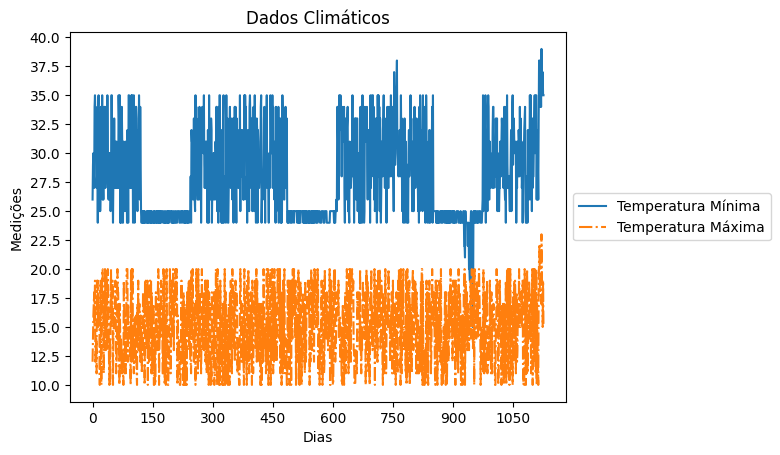

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def floatValues(info, lista):
    for x in info.values:
        #x = x.replace(",", ".")
        x = float(x)
        lista.append(x)
    return lista

# função que cria gráfico para Exe07
def lineGraph(x, y, label1, label2, xlabel, ylabel, title):
    fig, ax = plt.subplots()

    ax.plot(x, label = label1)
    ax.plot(y, '-.', label = label2)
    
    # MaxNLocator para limitar a quantidade de ticks nos axis do gráfico
    ax.yaxis.set_major_locator(plt.MaxNLocator(15))
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.title(title)
    plt.show()


data = pd.read_csv('dados_climaticos.csv')


# EXE01
mediaM = pd.DataFrame({'data': pd.to_datetime(data['Data'], errors = 'coerce', format = '%d/%m/%Y'),
                       'média': (data["Temp_Max"] + data["Temp_Min"]) / 2,})

mediaM = mediaM.groupby(pd.Grouper(key='data', freq='M'))

mDF = []
mediaMensal = []

for month, group in mediaM:
    DF = pd.DataFrame(group)
    mDF.append(DF)

for dataframe in mDF:
    x = dataframe['média'].median()
    mediaMensal.append(x)
#print(mediaMensal)

medias = pd.DataFrame({'Mês': ['Jan 2020', 'Fev 2020', 'Mar 2020', 'Abr 2020',
                               'Mai 2020', 'Jun 2020', 'Jul 2020', 'Ago 2020',
                               'Set 2020', 'Out 2020', 'Nov 2020', 'Dez 2020', 
                               'Jan 2021', 'Fev 2021', 'Mar 2021', 'Abr 2021',
                               'Mai 2021', 'Jun 2021', 'Jul 2021', 'Ago 2021',
                               'Set 2021', 'Out 2021', 'Nov 2021', 'Dez 2021', 
                               'Jan 2022', 'Fev 2022', 'Mar 2022', 'Abr 2022',
                               'Mai 2022', 'Jun 2022', 'Jul 2022', 'Ago 2022',
                               'Set 2022', 'Out 2022', 'Nov 2022', 'Dez 2022', 
                               'Jan 2023'],
                      'Temp_Média': mediaMensal})

print("Temperatura média de cada mês do período analisado:")
print(medias, "\n\n")

# EXE02 - temp máx durante o período
temps = data['Temp_Max']
print(f"Temperatura mais alta registrada durante o período de análise: {temps.max()}ºc\n\n")


# EXE03 - mês com a umidade média mais elevada


    
# EXE04 - mês mais quente



# EXE05 - qual a tendência



# EXE06 - média de incidência de raios UV em 2022

# criando um dataframe separado apenas com valores UV e dentro da range pedida
UV = pd.DataFrame({'Data': pd.to_datetime(data['Data'], errors = 'coerce', format = '%d/%m/%Y'),
                   'UV': data['Radiacao_UV']})

dateBegin = pd.to_datetime('01/01/2022', errors = 'coerce', format = '%d/%m/%Y')
dateEnd = pd.to_datetime('31/12/2022', errors = 'coerce', format = '%d/%m/%Y')
UVlist = []
UVlist = floatValues(data['Radiacao_UV'], UVlist)

mask = (UV['Data'] >= dateBegin) & (UV['Data'] <= dateEnd)
UV = UV.loc[mask]
UV = UV[::-1].reset_index()
del UV['index']
#print(UV)

# média da coluna
UVmed = UV['UV'].median()
print(f'Média de incidência de raios UV no ano de 2022: {UVmed}')


# EXE07 - line graph das temperaturas ao longo do período
tempMin = []
tempMax = []

tempMin = floatValues(data['Temp_Max'], tempMin)
tempMax = floatValues(data['Temp_Min'], tempMax)

# gráfico de linhas de temperatura média 
#title = 'Dados Climáticos'
#lineGraph(mediaMensal, 'Temperatura Média', 'Meses', 'Medições', title)

title = 'Dados Climáticos'
lineGraph(tempMin, tempMax, 'Temperatura Mínima', 'Temperatura Máxima', 'Dias', 'Medições', title)


# EXE08 - bar graph mostrando temp média por mês

In [25]:
import pandas as pd

# Create a DataFrame with dates and temperature readings
df = pd.DataFrame({'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-01', '2023-02-02', '2023-02-03']),
                   'Min_Temp': [10, 12, 14, 16, 18, 20],
                   'Max_Temp': [20, 22, 24, 26, 28, 30]})

# Group the DataFrame by month
df_grouped = df.groupby(pd.Grouper(key='Date', freq='M'))

# Create a list of empty DataFrames to store the grouped data
monthly_dataframes = []

# Iterate over the grouped data and create a DataFrame for each month
for month, group in df_grouped:
    monthly_dataframe = pd.DataFrame(group)
    monthly_dataframes.append(monthly_dataframe)

# Print the monthly DataFrames
for dataframe in monthly_dataframes:
    print(dataframe)


        Date  Min_Temp  Max_Temp
0 2023-01-01        10        20
1 2023-01-02        12        22
2 2023-01-03        14        24
        Date  Min_Temp  Max_Temp
3 2023-02-01        16        26
4 2023-02-02        18        28
5 2023-02-03        20        30
